⚠️  skipping line 2052: too few values → 599.92+56962104


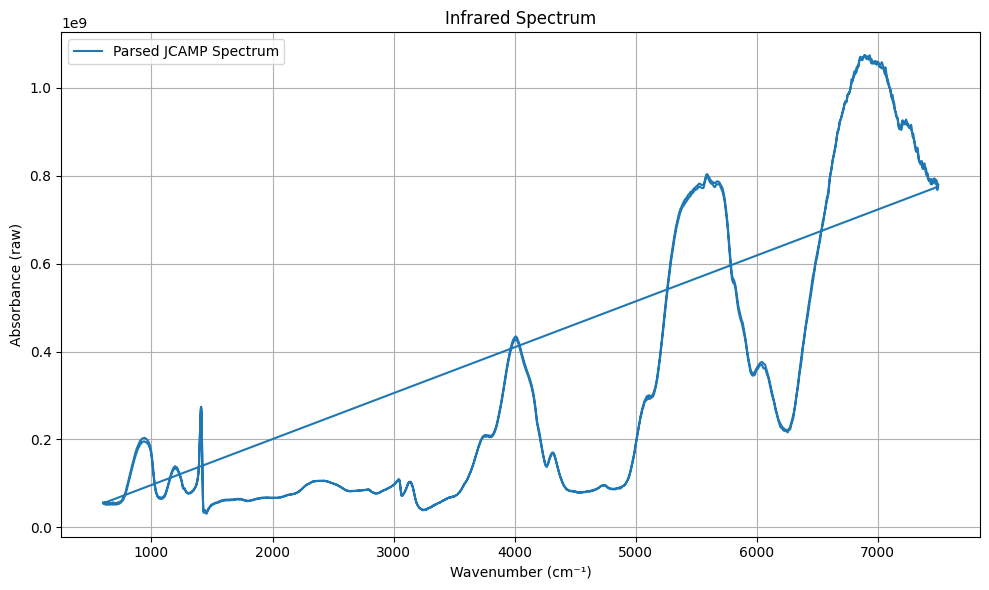

[7498.99, 7498.0254991599995, 7497.06099832, 7496.09649748, 7495.13199664, 7494.167495799999, 7493.20299496, 7492.24, 7491.2754991599995, 7490.31099832, 7489.34649748, 7488.38199664, 7487.417495799999, 7486.45299496, 7485.49, 7484.5254991599995, 7483.56099832, 7482.59649748, 7481.63199664, 7480.667495799999, 7479.70299496, 7478.74, 7477.7754991599995, 7476.81099832, 7475.84649748, 7474.88199664, 7473.917495799999, 7472.95299496, 7471.99, 7471.0254991599995, 7470.06099832, 7469.09649748, 7468.13199664, 7467.167495799999, 7466.20299496, 7465.24, 7464.2754991599995, 7463.31099832, 7462.34649748, 7461.38199664, 7460.417495799999, 7459.45299496, 7458.48, 7457.515499159999, 7456.55099832, 7455.58649748, 7454.621996639999, 7453.657495799999, 7452.69299496, 7451.73, 7450.765499159999, 7449.80099832, 7448.83649748, 7447.871996639999, 7446.907495799999, 7445.94299496, 7444.98, 7444.015499159999, 7443.05099832, 7442.08649748, 7441.121996639999, 7440.157495799999, 7439.19299496, 7438.23, 7437.2654

In [2]:
import matplotlib.pyplot as plt

# we'll store our final x and y values here
x_values = []
y_values = []

# known constant: spacing between x-points
deltax = -0.96450084  # from JCAMP metadata

# open the file using a forgiving encoding
with open("12125-02-9-IR.jdx", "r", encoding="latin-1") as file:
    lines = file.readlines()

# go through each line in the file
for line_number, line in enumerate(lines, start=1):
    line = line.strip()

    # skip header lines and empty lines
    if line.startswith("##") or not line:
        continue

    # try to split the line into the starting x and the y-values chunk
    try:
        parts = line.split("+")
        if len(parts) < 4:
            # not enough y-values to be a valid data line
            print(f"⚠️  skipping line {line_number}: too few values → {line}")
            continue

        start_x = float(parts[0])  # first number is the x start
        y_strings = parts[1:]      # remaining items are y-values (as strings)

        # convert y-values from string to integer
        y_row = [int(y) for y in y_strings]

        # calculate the x-values for this row using deltax
        x_row = [start_x + i * deltax for i in range(len(y_row))]

        # add to the full list
        x_values.extend(x_row)
        y_values.extend(y_row)

    except Exception as e:
        print(f"❌ error parsing line {line_number}: {e}")

# make sure we have valid data before plotting
if len(x_values) != len(y_values) or not x_values:
    print("❌ no valid data to plot.")
else:
    # plot the parsed spectrum
    plt.figure(figsize=(10, 6))
    plt.plot(x_values, y_values, label="Parsed JCAMP Spectrum")
    plt.title("Infrared Spectrum")
    plt.xlabel("Wavenumber (cm⁻¹)")
    plt.ylabel("Absorbance (raw)")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()
print(x_values)